In [25]:
from perceptron import Perceptron
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [26]:
def mean(array):
    return sum(array)/len(array)

def stddev(array):
    _mean = mean(array)
    summation = 0
    for num in array:
        summation += (num - _mean)**2
    return (summation/len(array))**0.5

In [27]:
def plot_solution(X, Y, weights, l, s):
    X1 = X[:,0]
    X2 = X[:,1]
    
    get_line_y = lambda x, c0, c1: c0 + c1 * x

    c0 = weights[0]/weights[2]
    c1 = -weights[1]/weights[2]

    lineX = np.array([X1.min(), X1.max()])
    lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

    binary_cmap = ListedColormap(['red', 'blue'])

    fig, ax = plt.subplots(figsize=(8,8))
    ax.set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
           title='Dados de entrada e solução para η = %s e I = (-%s, +%s)' %(str(l), str(s), str(s)))

    scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap, linewidth=0)
    ax.plot(lineX, lineY, color="black", alpha= 0.5)

    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))

In [28]:
def fit_and_get_data(X, Y, fit_info, learn, samp):
    p = Perceptron()
    p.fit(X, Y, num_epochs = 100, learning_rate = learn, sampling_range = samp)
    
    fit_info['η'].append(learn)
    fit_info['I'].append(samp)
    fit_info['Média'].append(mean(p.epoch_changes))
    fit_info['Desvio padrão'].append(stddev(p.epoch_changes))
    fit_info['Épocas'].append(len(p.epoch_changes))
    
    return fit_info, p.weights
    

In [29]:
data = np.fromfile('../data/data0.txt')
data = data.reshape(data.shape[0]//3, 3)

X = data[:,:-1]
Y = data[:,-1]

fit_info = {
    "η": [],
    "I": [],
    "Média": [],
    "Desvio padrão": [],
    "Épocas": []
}

## Para η = 0,4 e I = (-100, +100)

In [30]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 100)

Pesos iniciais: [-1.78260859 -3.70785485  5.17130486]
------ Época 1 ------
Novos pesos: [-1.38260859 -3.70725738  5.185632  ]
Novos pesos: [-0.98260859 -3.71219716  5.1446339 ]
Novos pesos: [-0.58260859 -3.76801555  5.12220557]
Novos pesos: [-0.18260859 -3.73502936  5.05927589]
Novos pesos: [ 0.21739141 -3.69995808  5.07512265]
Novos pesos: [ 0.61739141 -3.66615689  5.03627737]
Novos pesos: [ 1.01739141 -3.58610954  5.03324537]
Novos pesos: [ 1.41739141 -3.53869283  4.96074689]
Novos pesos: [ 1.81739141 -3.46220311  4.87462665]
Novos pesos: [ 1.41739141 -2.99958319  5.26062431]
Novos pesos: [ 1.01739141 -2.62127791  5.56703734]
Total de ajustes: 11
------ Época 2 ------
Novos pesos: [ 1.41739141 -2.58829172  5.50410766]
Novos pesos: [ 1.81739141 -2.511802    5.41798742]
Novos pesos: [ 1.41739141 -2.13349673  5.72440045]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [ 1.81739141 -2.05700701  5.63828021]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época

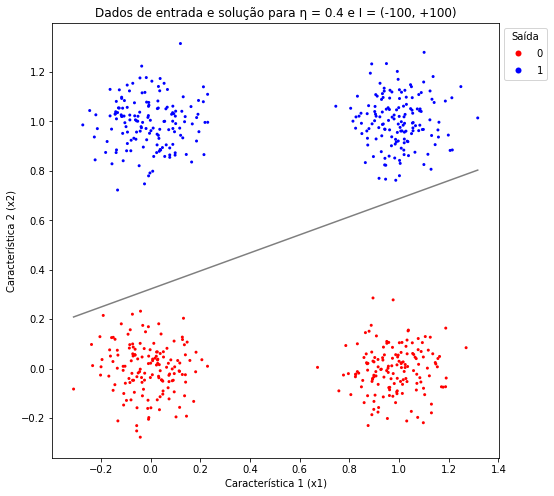

In [31]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,4 e I = (-1, +1)

In [32]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 1)

Pesos iniciais: [-0.42626996 -0.27837977 -0.21558087]
------ Época 1 ------
Novos pesos: [-0.02626996 -0.27778229 -0.20125373]
Novos pesos: [ 0.37373004 -0.28272207 -0.24225183]
Novos pesos: [-0.02626996 -0.34513952  0.08897893]
Novos pesos: [-0.42626996  0.03094156  0.5377939 ]
Total de ajustes: 4
------ Época 2 ------
Novos pesos: [-0.02626996  0.03153904  0.55212104]
Novos pesos: [0.37373004 0.02659926 0.51112294]
Novos pesos: [-0.02626996 -0.02681909  0.7999733 ]
Novos pesos: [ 0.37373004 -0.38481791  0.78773843]
Novos pesos: [-0.02626996  0.07780201  1.17373609]
Total de ajustes: 5
------ Época 3 ------
Novos pesos: [0.37373004 0.07286223 1.132738  ]
Novos pesos: [ 0.77373004 -0.31759754  1.02150853]
Novos pesos: [0.37373004 0.14502239 1.40750619]
Total de ajustes: 3
------ Época 4 ------
Novos pesos: [ 0.77373004 -0.33017806  1.3418812 ]
Novos pesos: [0.37373004 0.04812722 1.64829423]
Total de ajustes: 2
------ Época 5 ------
Novos pesos: [0.77373004 0.06457544 1.55530692]
Total 

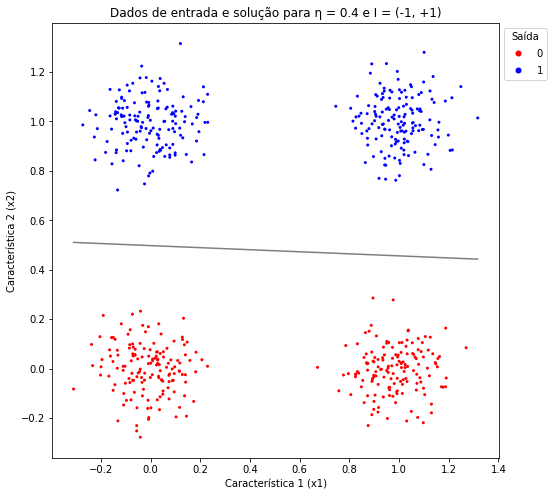

In [33]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,4 e I = (-0.5, +0.5)

In [34]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 0.5)

Pesos iniciais: [-0.21952548  0.08493228  0.05739733]
------ Época 1 ------
Novos pesos: [0.18047452 0.08552976 0.07172447]
Novos pesos: [-0.21952548  0.02311231  0.40295523]
Novos pesos: [ 0.18047452 -0.29525337  0.41095064]
Novos pesos: [-0.21952548  0.16736655  0.79694831]
Total de ajustes: 4
------ Época 2 ------
Novos pesos: [0.18047452 0.16796402 0.81127544]
Novos pesos: [0.58047452 0.18441224 0.71828814]
Novos pesos: [0.18047452 0.1219948  1.0495189 ]
Novos pesos: [ 0.58047452 -0.28126068  1.02323073]
Novos pesos: [0.18047452 0.09704459 1.32964376]
Total de ajustes: 5
------ Época 3 ------
Novos pesos: [0.58047452 0.13003078 1.26671408]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 ------
Total de a

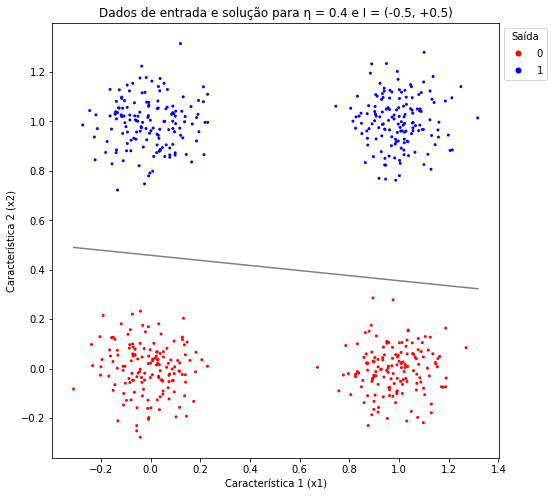

In [35]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,1 e I = (-100, +100)

In [36]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 100)

Pesos iniciais: [-44.38654576 -36.95790244 -19.39456951]
------ Época 1 ------
Novos pesos: [-44.28654576 -36.95775307 -19.39098773]
Novos pesos: [-44.18654576 -36.95898802 -19.40123725]
Novos pesos: [-44.08654576 -36.97294262 -19.40684433]
Novos pesos: [-43.98654576 -36.96469607 -19.42257675]
Novos pesos: [-43.88654576 -36.96177571 -19.41426249]
Novos pesos: [-43.78654576 -36.95300789 -19.4103008 ]
Novos pesos: [-43.68654576 -36.9445576  -19.42001213]
Novos pesos: [-43.58654576 -36.94362714 -19.42207497]
Novos pesos: [-43.48654576 -36.92361531 -19.42283297]
Novos pesos: [-43.38654576 -36.91991055 -19.41925987]
Novos pesos: [-43.28654576 -36.92729094 -19.4070428 ]
Novos pesos: [-43.18654576 -36.92176677 -19.39124299]
Novos pesos: [-43.08654576 -36.91547814 -19.39911221]
Novos pesos: [-42.98654576 -36.91813118 -19.40591551]
Novos pesos: [-42.88654576 -36.91462193 -19.40039296]
Novos pesos: [-42.78654576 -36.90771506 -19.39570417]
Novos pesos: [-42.68654576 -36.90047641 -19.40170504]
Nov

Novos pesos: [-26.48654576 -21.80343262  -2.41444062]
Novos pesos: [-26.38654576 -21.80857592  -2.41915608]
Novos pesos: [-26.28654576 -21.80332506  -2.42311039]
Novos pesos: [-26.18654576 -21.80409921  -2.4269936 ]
Novos pesos: [-26.08654576 -21.80825804  -2.44101579]
Novos pesos: [-25.98654576 -21.81771406  -2.43164824]
Novos pesos: [-25.88654576 -21.81061952  -2.43677748]
Novos pesos: [-25.78654576 -21.81438886  -2.42543189]
Novos pesos: [-25.68654576 -21.79054175  -2.43522057]
Novos pesos: [-25.58654576 -21.77033577  -2.43263281]
Novos pesos: [-25.48654576 -21.77040145  -2.41681747]
Novos pesos: [-25.38654576 -21.77116101  -2.42005195]
Novos pesos: [-25.28654576 -21.77021733  -2.43701248]
Novos pesos: [-25.18654576 -21.77675772  -2.44524918]
Novos pesos: [-25.08654576 -21.77353801  -2.46274949]
Novos pesos: [-24.98654576 -21.77675848  -2.48089488]
Novos pesos: [-24.88654576 -21.75763605  -2.50242494]
Novos pesos: [-24.78654576 -21.74925432  -2.4968231 ]
Novos pesos: [-24.68654576 -

Novos pesos: [-1.08654576 -8.8981807   9.14895042]
Novos pesos: [-1.18654576 -8.79772033  9.23193728]
Novos pesos: [-1.28654576 -8.68610603  9.31859719]
Novos pesos: [-1.38654576 -8.56466357  9.40700428]
Novos pesos: [-1.48654576 -8.44410548  9.49523048]
Total de ajustes: 125
------ Época 6 ------
Novos pesos: [-1.38654576 -8.44395611  9.49881226]
Novos pesos: [-1.28654576 -8.44519106  9.48856274]
Novos pesos: [-1.18654576 -8.45914566  9.48295566]
Novos pesos: [-1.08654576 -8.45089911  9.46722324]
Novos pesos: [-0.98654576 -8.44797875  9.4755375 ]
Novos pesos: [-0.88654576 -8.43921093  9.47949919]
Novos pesos: [-0.78654576 -8.43076064  9.46978786]
Novos pesos: [-0.68654576 -8.42983018  9.46772502]
Novos pesos: [-0.58654576 -8.40981835  9.46696702]
Novos pesos: [-0.48654576 -8.40611359  9.47054012]
Novos pesos: [-0.38654576 -8.39982497  9.46267091]
Novos pesos: [-0.28654576 -8.40247801  9.4558676 ]
Novos pesos: [-0.18654576 -8.39896875  9.46139015]
Novos pesos: [-0.08654576 -8.39206188 

Total de ajustes: 0
------ Época 78 ------
Total de ajustes: 0
------ Época 79 ------
Total de ajustes: 0
------ Época 80 ------
Total de ajustes: 0
------ Época 81 ------
Total de ajustes: 0
------ Época 82 ------
Total de ajustes: 0
------ Época 83 ------
Total de ajustes: 0
------ Época 84 ------
Total de ajustes: 0
------ Época 85 ------
Total de ajustes: 0
------ Época 86 ------
Total de ajustes: 0
------ Época 87 ------
Total de ajustes: 0
------ Época 88 ------
Total de ajustes: 0
------ Época 89 ------
Total de ajustes: 0
------ Época 90 ------
Total de ajustes: 0
------ Época 91 ------
Total de ajustes: 0
------ Época 92 ------
Total de ajustes: 0
------ Época 93 ------
Total de ajustes: 0
------ Época 94 ------
Total de ajustes: 0
------ Época 95 ------
Total de ajustes: 0
------ Época 96 ------
Total de ajustes: 0
------ Época 97 ------
Total de ajustes: 0
------ Época 98 ------
Total de ajustes: 0
------ Época 99 ------
Total de ajustes: 0
------ Época 100 ------
Total de a

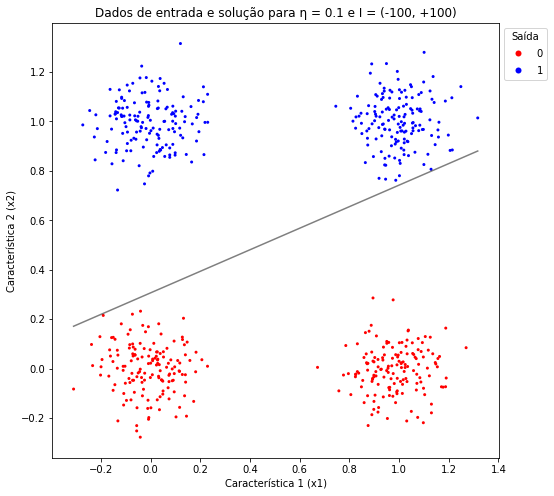

In [37]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,1 e I = (-1, +1)

In [38]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 1)

Pesos iniciais: [-0.21304806 -0.4504004   0.1716584 ]
------ Época 1 ------
Novos pesos: [-0.11304806 -0.45025103  0.17524018]
Novos pesos: [-0.01304806 -0.45148597  0.16499066]
Novos pesos: [ 0.08695194 -0.44323942  0.14925824]
Novos pesos: [ 0.18695194 -0.42322759  0.14850024]
Novos pesos: [ 0.08695194 -0.41649671  0.2613576 ]
Novos pesos: [-0.01304806 -0.32247644  0.37356135]
Novos pesos: [-0.11304806 -0.22790012  0.4501646 ]
Total de ajustes: 7
------ Época 2 ------
Novos pesos: [-0.01304806 -0.22775075  0.45374639]
Novos pesos: [ 0.08695194 -0.2289857   0.44349686]
Novos pesos: [ 0.18695194 -0.22073915  0.42776444]
Novos pesos: [ 0.08695194 -0.10508417  0.52426386]
Total de ajustes: 4
------ Época 3 ------
Novos pesos: [ 0.18695194 -0.09683762  0.50853144]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 

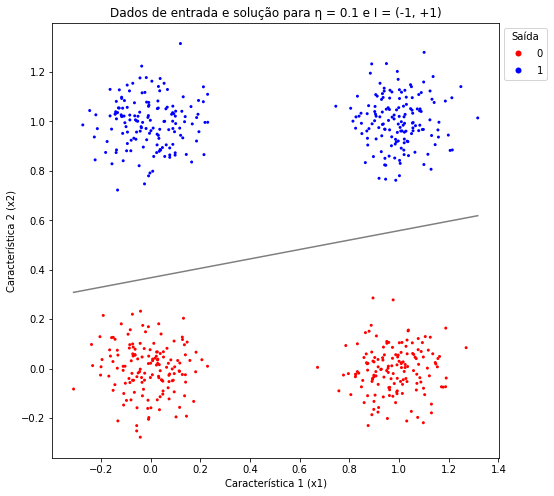

In [39]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,1 e I = (-0.5, +0.5)

In [40]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 0.5)

Pesos iniciais: [0.16085339 0.17287923 0.05367752]
------ Época 1 ------
Novos pesos: [0.06085339 0.15727487 0.13648521]
Novos pesos: [0.16085339 0.07768345 0.13848407]
Total de ajustes: 2
------ Época 2 ------
Novos pesos: [0.06085339 0.06207909 0.22129176]
Novos pesos: [ 0.16085339 -0.02742062  0.21823304]
Novos pesos: [0.06085339 0.0671557  0.2948363 ]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [0.16085339 0.07126776 0.27158947]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 ------
Total de ajustes: 0
------ Época 12 ------
Total de ajustes: 0
------ Época 13 ------
Total de ajustes: 0
------ Época 14 ------
Total de ajustes: 0
------ Época 15 ------
Total de ajustes: 0
------ Época 16 ------

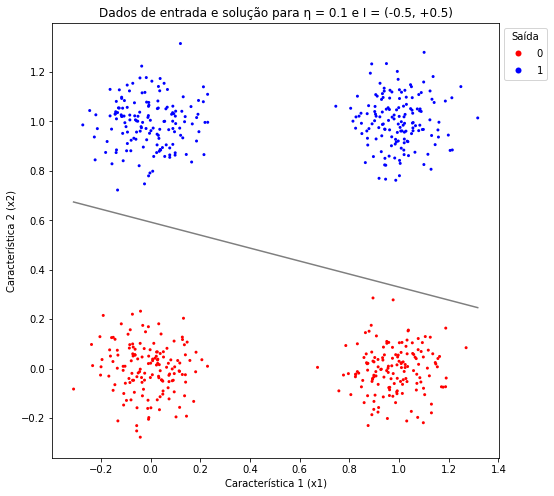

In [41]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,01 e I = (-100, +100)

In [42]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 100)

Pesos iniciais: [29.86801453 -5.84308456 20.97746386]
------ Época 1 ------
Novos pesos: [29.85801453 -5.84464499 20.98574463]
Novos pesos: [29.84801453 -5.8439719  20.99703037]
Novos pesos: [29.83801453 -5.84454291 21.00659453]
Novos pesos: [29.82801453 -5.84629914 21.0157772 ]
Novos pesos: [29.81801453 -5.84486764 21.02443585]
Novos pesos: [29.80801453 -5.84450579 21.03566831]
Novos pesos: [29.79801453 -5.84362167 21.04567211]
Novos pesos: [29.78801453 -5.84289825 21.05533288]
Novos pesos: [29.77801453 -5.84374213 21.06558412]
Novos pesos: [29.76801453 -5.84257532 21.07530837]
Novos pesos: [29.75801453 -5.84157124 21.08571776]
Novos pesos: [29.74801453 -5.84100765 21.09429739]
Novos pesos: [29.73801453 -5.84067829 21.10360645]
Novos pesos: [29.72801453 -5.83849405 21.11356102]
Novos pesos: [29.71801453 -5.83892752 21.12531323]
Novos pesos: [29.70801453 -5.83957205 21.13553349]
Novos pesos: [29.69801453 -5.83922826 21.14432135]
Novos pesos: [29.68801453 -5.83891768 21.1557293 ]
Novos 

Novos pesos: [24.15801453 -3.09658977 26.55075691]
Novos pesos: [24.14801453 -3.09646978 26.55933575]
Novos pesos: [24.13801453 -3.09558091 26.56840229]
Novos pesos: [24.12801453 -3.09638234 26.57721045]
Novos pesos: [24.11801453 -3.09819832 26.5859512 ]
Novos pesos: [24.10801453 -3.09605484 26.59460432]
Novos pesos: [24.09801453 -3.09421083 26.60380611]
Novos pesos: [24.08801453 -3.08264533 26.61345605]
Novos pesos: [24.07801453 -3.0731877  26.62111638]
Novos pesos: [24.06801453 -3.06372349 26.62933971]
Novos pesos: [24.05801453 -3.05370839 26.63714034]
Novos pesos: [24.04801453 -3.04338128 26.64633639]
Novos pesos: [24.03801453 -3.03209335 26.65439775]
Novos pesos: [24.02801453 -3.02224866 26.66347671]
Novos pesos: [24.01801453 -3.01294562 26.67288962]
Novos pesos: [24.00801453 -3.00366177 26.68166154]
Novos pesos: [23.99801453 -2.9945867  26.69094757]
Novos pesos: [23.98801453 -2.98525638 26.70081937]
Novos pesos: [23.97801453 -2.9742781  26.71049043]
Novos pesos: [23.96801453 -2.96

Novos pesos: [21.13801453 -0.88051248 29.03372567]
Total de ajustes: 1
------ Época 34 ------
Novos pesos: [21.12801453 -0.88184794 29.04094693]
Total de ajustes: 1
------ Época 35 ------
Novos pesos: [21.11801453 -0.8831834  29.04816818]
Total de ajustes: 1
------ Época 36 ------
Novos pesos: [21.10801453 -0.88451886 29.05538944]
Total de ajustes: 1
------ Época 37 ------
Novos pesos: [21.09801453 -0.88585432 29.0626107 ]
Total de ajustes: 1
------ Época 38 ------
Total de ajustes: 0
------ Época 39 ------
Total de ajustes: 0
------ Época 40 ------
Total de ajustes: 0
------ Época 41 ------
Total de ajustes: 0
------ Época 42 ------
Total de ajustes: 0
------ Época 43 ------
Total de ajustes: 0
------ Época 44 ------
Total de ajustes: 0
------ Época 45 ------
Total de ajustes: 0
------ Época 46 ------
Total de ajustes: 0
------ Época 47 ------
Total de ajustes: 0
------ Época 48 ------
Total de ajustes: 0
------ Época 49 ------
Total de ajustes: 0
------ Época 50 ------
Total de ajust

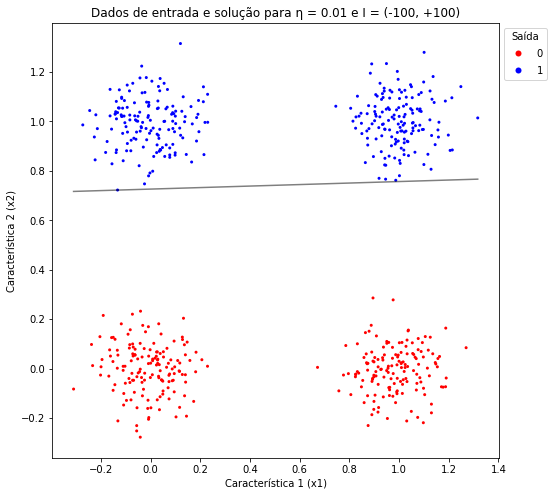

In [43]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,01 e I = (-1, +1)

In [44]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 1)

Pesos iniciais: [-0.1111581   0.39553257  0.02970283]
------ Época 1 ------
Novos pesos: [-0.1011581   0.39554751  0.03006101]
Novos pesos: [-0.0911581   0.39542401  0.02903606]
Novos pesos: [-0.0811581   0.39402855  0.02847535]
Novos pesos: [-0.0711581   0.39485321  0.02690211]
Novos pesos: [-0.0611581   0.39514524  0.02773353]
Novos pesos: [-0.0511581   0.39602202  0.0281297 ]
Novos pesos: [-0.0411581   0.39686705  0.02715857]
Novos pesos: [-0.0311581   0.3969601   0.02695228]
Novos pesos: [-0.0211581   0.39733057  0.02730959]
Novos pesos: [-0.0111581   0.39659254  0.0285313 ]
Novos pesos: [-0.0011581   0.39632723  0.02785097]
Novos pesos: [0.0088419  0.39546219 0.02786166]
Novos pesos: [0.0188419  0.39494786 0.02739011]
Novos pesos: [0.0288419  0.39453198 0.02598789]
Novos pesos: [0.0388419  0.39358637 0.02692465]
Novos pesos: [0.0488419  0.39214648 0.02884344]
Novos pesos: [0.0588419  0.38986014 0.02874451]
Novos pesos: [0.0688419  0.38780128 0.02838253]
Novos pesos: [0.0788419  0.

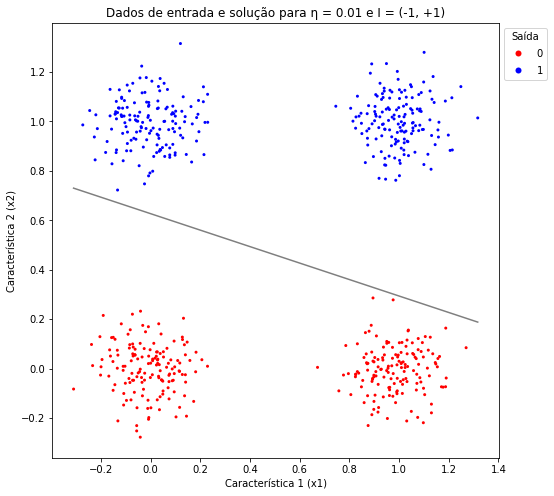

In [45]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

## Para η = 0,01 e I = (-0.5, +0.5)

In [46]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 0.5)

Pesos iniciais: [0.18200295 0.13205917 0.03979079]
------ Época 1 ------
Novos pesos: [0.17200295 0.13049873 0.04807156]
Novos pesos: [0.16200295 0.13117182 0.0593573 ]
Novos pesos: [0.15200295 0.13060082 0.06892146]
Novos pesos: [0.14200295 0.12884458 0.07810413]
Novos pesos: [0.13200295 0.13027608 0.08676278]
Novos pesos: [0.12200295 0.13063794 0.09799524]
Novos pesos: [0.11200295 0.13152206 0.10799904]
Novos pesos: [0.10200295 0.13067817 0.11825028]
Novos pesos: [0.09200295 0.12956882 0.12665463]
Novos pesos: [0.08200295 0.1273297  0.13509531]
Novos pesos: [0.07200295 0.12599424 0.14231657]
Novos pesos: [0.08200295 0.1180351  0.14251646]
Novos pesos: [0.09200295 0.10908513 0.14221058]
Novos pesos: [0.10200295 0.09900374 0.14155338]
Novos pesos: [0.11200295 0.08752381 0.14136286]
Novos pesos: [0.12200295 0.0756438  0.13972224]
Total de ajustes: 16
------ Época 2 ------
Novos pesos: [0.11200295 0.07408336 0.14800301]
Novos pesos: [0.10200295 0.07184424 0.15644368]
Novos pesos: [0.1120

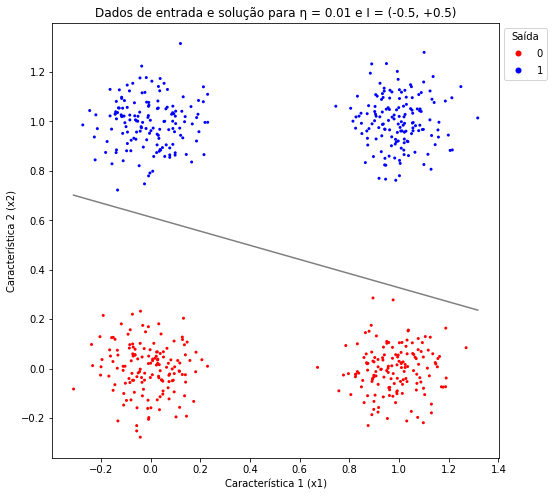

In [47]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

In [48]:
pd.DataFrame.from_dict(fit_info)

,η,I,Média,Desvio padrão,Épocas
0,0.40,100.0,5.000000,4.320494,3
1,0.40,1.0,3.000000,1.414214,5
2,0.40,0.5,3.333333,1.699673,3
3,0.10,100.0,58.684211,89.870698,19
4,0.10,1.0,4.000000,2.449490,3
5,0.10,0.5,2.000000,0.816497,3
6,0.01,100.0,23.702703,62.089676,37
7,0.01,1.0,14.200000,18.605376,5
8,0.01,0.5,5.500000,6.103278,4
